In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

haberman1=pd.read_csv("haberman.csv")
haberman=pd.DataFrame(haberman1)

In [2]:
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [3]:
print(haberman.shape)

(305, 4)


In [4]:
print(haberman)

     age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
..   ...   ...    ...     ...
300   74    63      0       1
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1
304   78    65      1       2

[305 rows x 4 columns]


In [5]:
print(haberman.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     305 non-null    int64
 1   year    305 non-null    int64
 2   nodes   305 non-null    int64
 3   status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


# ALL THE FEATURES ARE OF DATA TYPE INTEGER .SO WE HAVE TO MAP THE STATUS TO CTEGORICAL DATA i.e 1 FOR YES AND 2 FOR NO

In [6]:
haberman['status']=haberman['status'].map({1:'yes',2:'no'})


In [7]:
haberman[['status']]=haberman[['status']].replace({1:'yes',2:'no'})

In [8]:
haberman

,age,year,nodes,status
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes
...,...,...,...,...
300,74,63,0,yes
301,75,62,1,yes
302,76,67,0,yes
303,77,65,3,yes


In [9]:
haberman.describe()

,age,year,nodes
count,305.000000,305.000000,305.000000
mean,52.357377,62.868852,4.032787
std,10.678010,3.242783,7.200528
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.000000,66.000000,4.000000
max,78.000000,69.000000,52.000000


# observation:
        count=sum of all the elements in that column
        mean=sum of all the elemnts in that column divided by total number of observation
        std=standard deviation of that feature
        min=minimum value of that future
        25=gives the 25th percentile value
        50=gives the 50th percentile value
        75=gives the 75th percentile value
        max=gives the maximum of the feature

In [10]:
haberman['status'].value_counts()

yes    225
no      80
Name: status, dtype: int64

# observation:
    this is an imbalanced data

In [11]:
haberman_yes=haberman.loc[haberman["status"]=='yes']
haberman_no=haberman.loc[haberman['status']=='no']
print("haberman_yes")
print(haberman_yes.shape)
print("\nhaberman_no")
print(haberman_no.shape)

haberman_yes
(225, 4)

haberman_no
(80, 4)


In [12]:
haberman_yes.describe()


,age,year,nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [13]:
haberman_no.describe()

,age,year,nodes
count,80.000000,80.000000,80.000000
mean,53.312500,62.887500,7.525000
std,9.677841,3.318509,9.222942
min,34.000000,58.000000,0.000000
25%,46.000000,59.750000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.250000
max,78.000000,69.000000,52.000000


# objective:
    our objective is to classify who are survived after the surgery and who are not

# UNIVARIATE ANALYSIS

# probability density function

c:\users\tapas\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\tapas\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


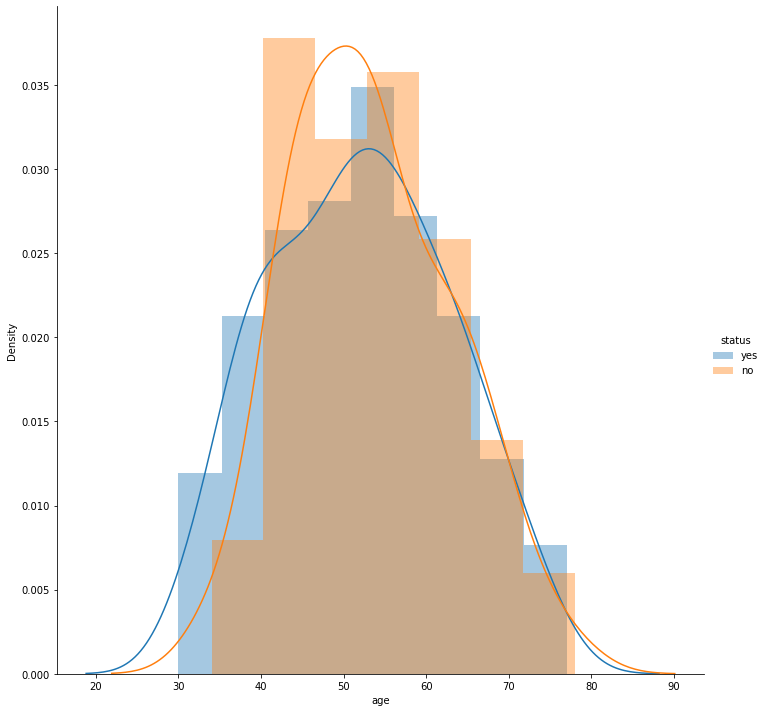

In [17]:
sns.FacetGrid(haberman,hue='status',height=10) \
    .map(sns.distplot,"age") \
    .add_legend()
plt.show()

# Observations:
    1.Major overlapping is observed, which tells us that survival chances are irrespective of a person’s age.
    2.Although there is overlapping we can vaguely tell that people whose age is in the range 30–40 are more likely to survive, and 40–60 are less likely to survive. While people whose age is in the range 60–75 have equal chances of surviving and not surviving.
    3.Yet, this cannot be our final conclusion. We cannot decide the survival chances of a patient just by considering the age parameter

c:\users\tapas\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\tapas\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


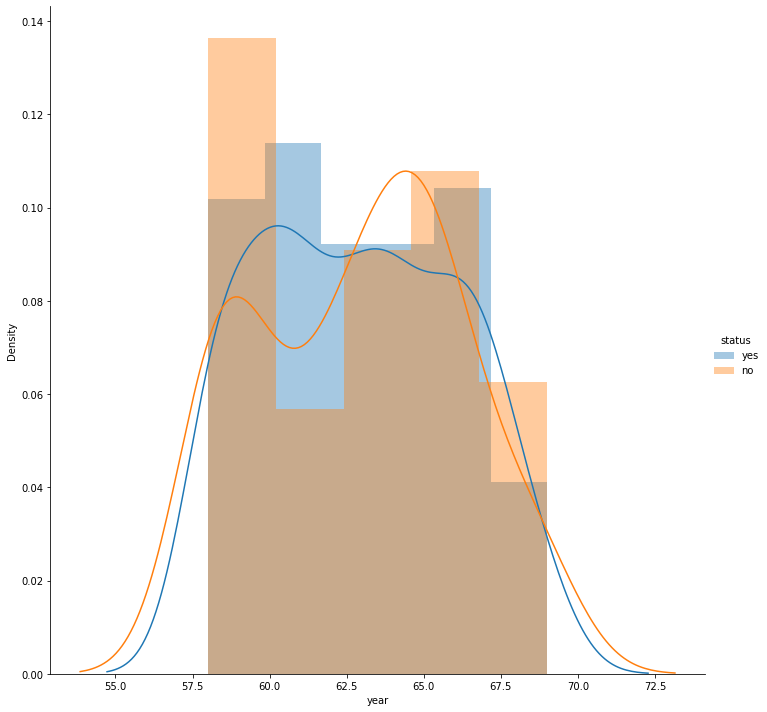

In [18]:
sns.FacetGrid(haberman,hue='status',height=10) \
    .map(sns.distplot,"year") \
    .add_legend()
plt.show()

# Observations:
    1.
    There is major overlapping observed. This graph only tells how many of the operations were successful and how many weren’t. 
    2.
    This cannot be a parameter to decide the patient’s survival chances.
However, it can be observed that in the years 1960 and 1965 there were more unsuccessful operations.

c:\users\tapas\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\tapas\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


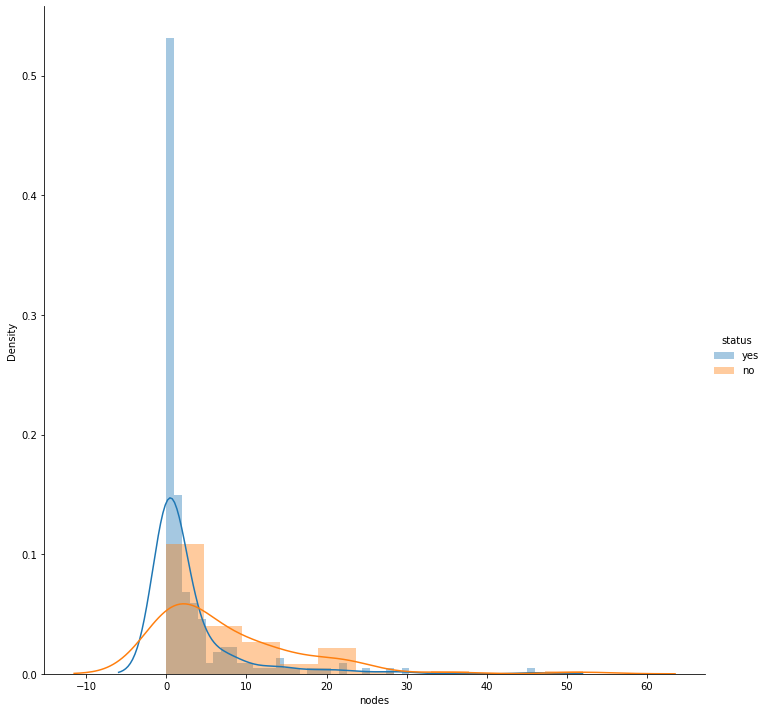

In [19]:
sns.FacetGrid(haberman,hue='status',height=10) \
    .map(sns.distplot,"nodes") \
    .add_legend()
plt.show()

# Observations:
    Patients with no nodes or 1 node are more likely to survive. There are very few chances of surviving if there are 25 or more nodes.

# cumulative distributive function

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
[0.5625 0.15   0.1375 0.05   0.075  0.     0.0125 0.     0.     0.0125]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


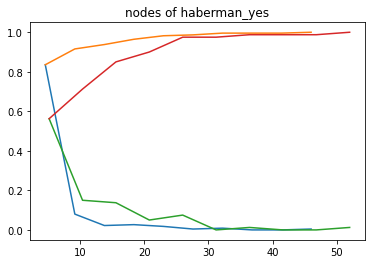

In [20]:
counts1,bin_edges1 = np.histogram(haberman_yes["nodes"],bins=10,density=True)
pdf1=counts1/(sum(counts1))
print(pdf1)
print(bin_edges1)


cdf1=np.cumsum(pdf1)
plt.plot(bin_edges1[1:],pdf1)
plt.plot(bin_edges1[1:],cdf1)
plt.title("nodes of haberman_yes")
print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
counts2,bin_edges2=np.histogram(haberman_no['nodes'],bins=10,density=True)
pdf2=counts2/(sum(counts2))
print(pdf2)
print(bin_edges2)

cdf2=np.cumsum(pdf2)
plt.plot(bin_edges2[1:],pdf2)
plt.plot(bin_edges2[1:],cdf2)
plt.show()

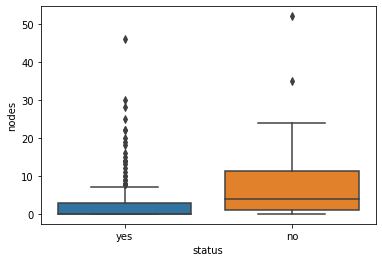

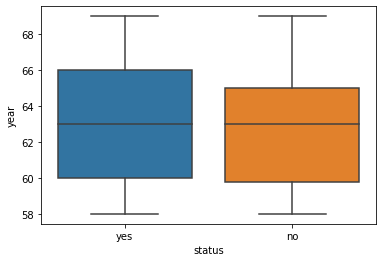

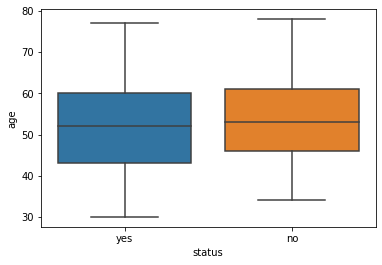

In [21]:
sns.boxplot(x='status',y='nodes',data=haberman)
plt.show()
sns.boxplot(x='status',y='year',data=haberman)
plt.show()
sns.boxplot(x='status',y='age',data=haberman)
plt.show()

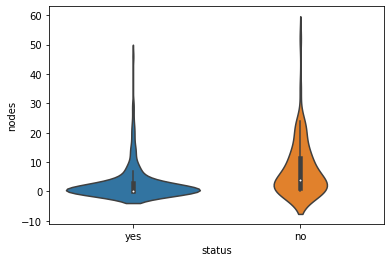

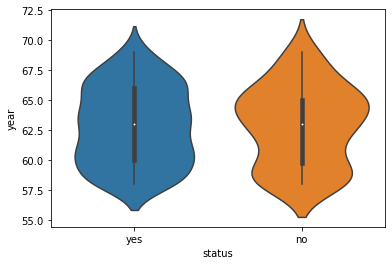

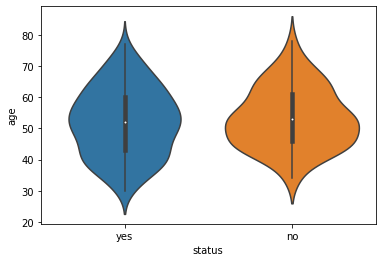

In [22]:
sns.violinplot(x='status',y='nodes',data=haberman,height=10)
plt.show()
sns.violinplot(x='status',y='year',data=haberman,height=10)
plt.show()
sns.violinplot(x='status',y='age',data=haberman,height=10)
plt.show()

# Observations:
    Patients with more than 1 nodes are not likely to survive. More the number of nodes, lesser the survival chances.
    A large percentage of patients who survived had 0 nodes. Yet there is a small percentage of patients who had no positive axillary nodes died within 5 years of operation, thus an absence of positive axillary nodes cannot always guarantee survival.
    There were comparatively more people who got operated in the year 1965 did not survive for more than 5 years.
    There were comparatively more people in the age group 45 to 65 who did not survive. Patient age alone is not an important parameter in determining the survival of a patient.
    The box plots and violin plots for age and year parameters give similar results with a substantial overlap of data points. The overlap in the box plot and the violin plot of nodes is less compared to other features but the overlap still exists and thus it is difficult to set a threshold to classify both classes of patients.

# BIVARIATE ANALYSIS

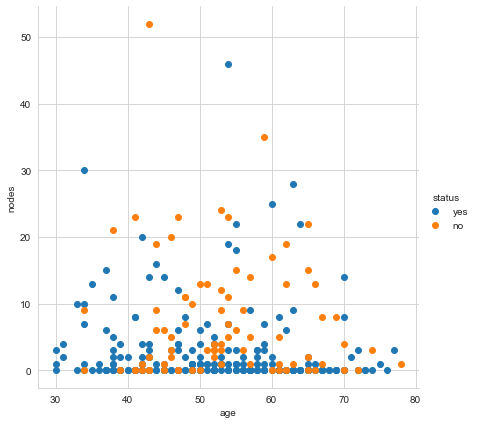

In [23]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue='status',height=6) \
    .map(plt.scatter,"age","nodes") \
    .add_legend()
plt.show()

# Observation:
    1.Patients with 0 nodes are more likely to survive irrespective of their age.
    2.There are hardly any patients who have nodes more than 25.
    3.Patients aged more than 50 with nodes more than 10 are less likely to survive.

# PAIR PLOT

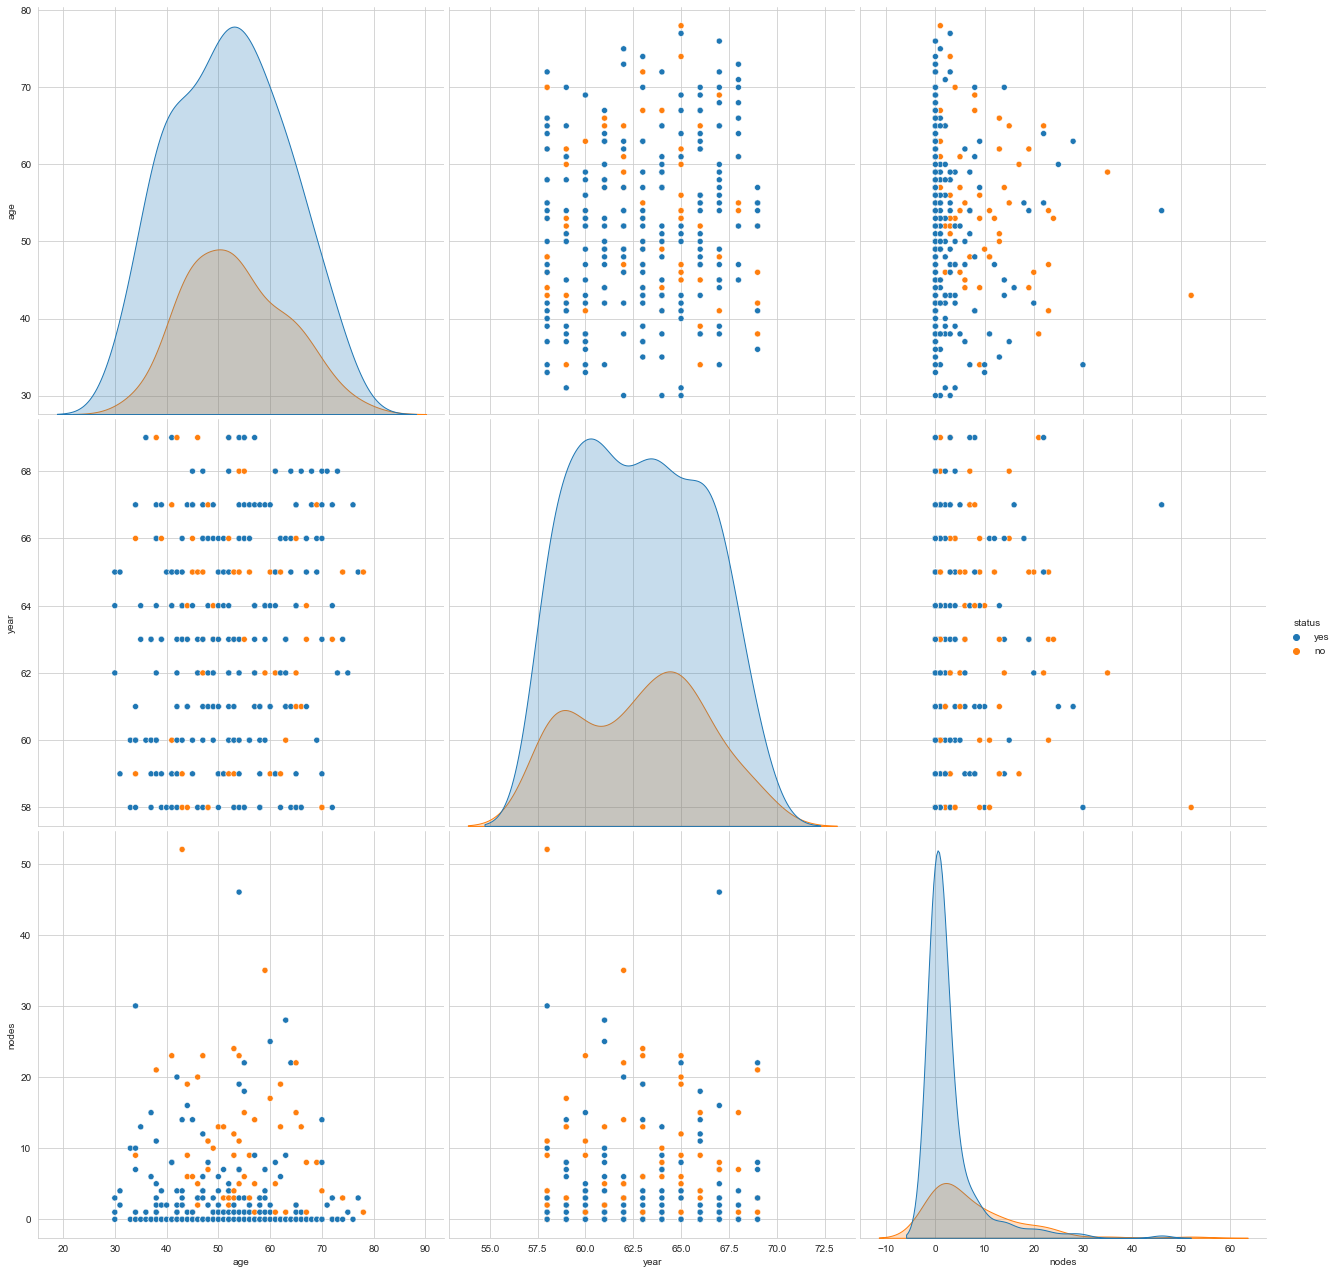

In [24]:
sns.set_style("whitegrid")
sns.pairplot(haberman,hue="status",height=6)
plt.show()

# Observations:
    1.The plot between year and nodes is comparatively better.

# MULTIVARIATE  ANALYSIS

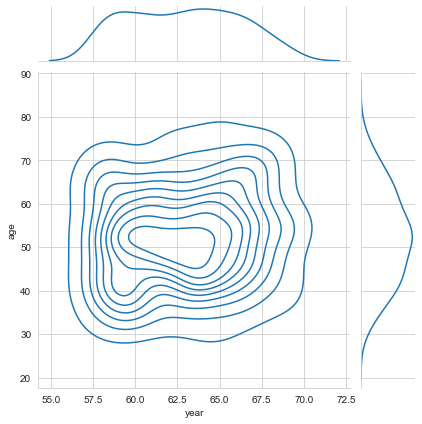

In [25]:
sns.jointplot(x='year',y='age',data=haberman,kind="kde")
plt.show()

# Observation:
    From 1960 to 1964, more operations done on the patients in the age group 45 to 55.


# CONCLUISON